In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random as rng
import math


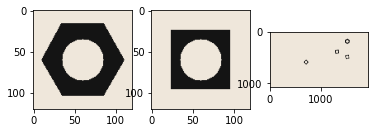

In [3]:

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

In [4]:
hexnut_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squarenut_gray = cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

ret_hexnut,th_hexnut = cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret_squarenut,th_squarenut = cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret_f100,th_f100 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

print("Threshold for hexnut:",ret_hexnut)
print("Threshold for squarenut:",ret_squarenut)
print("Threshold for conveyor belt image :",ret_f100)

Threshold for hexnut: 20.0
Threshold for squarenut: 20.0
Threshold for conveyor belt image : 20.0


Text(0.5, 1.0, 'After removing small holes')

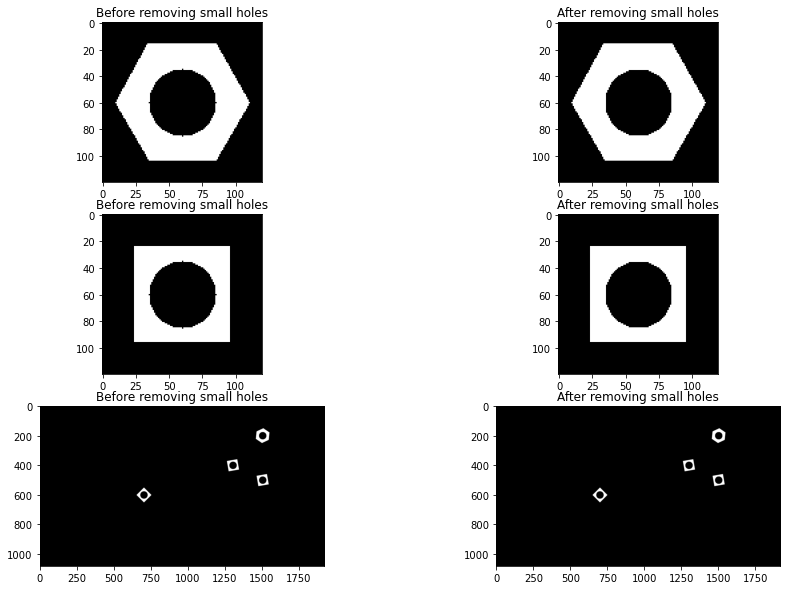

In [32]:
kernel= cv.getStructuringElement(cv.MORPH_RECT,(3,3))

hexnut_closing = cv.morphologyEx(th_hexnut, cv.MORPH_CLOSE, kernel)
squarenut_closing = cv.morphologyEx(th_squarenut, cv.MORPH_CLOSE, kernel)
f100_closing = cv.morphologyEx(th_f100, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(3,2,figsize = (15,10))

ax[0][0].imshow(cv.cvtColor(th_hexnut, cv.COLOR_RGB2BGR))
ax[0][0].set_title("Before removing small holes")
ax[0][1].imshow(cv.cvtColor(hexnut_closing, cv.COLOR_RGB2BGR))
ax[0][1].set_title("After removing small holes")

ax[1][0].imshow(cv.cvtColor(th_squarenut, cv.COLOR_RGB2BGR))
ax[1][0].set_title("Before removing small holes")
ax[1][1].imshow(cv.cvtColor(squarenut_closing, cv.COLOR_RGB2BGR))
ax[1][1].set_title("After removing small holes")

ax[2][0].imshow(cv.cvtColor(th_f100, cv.COLOR_RGB2BGR))
ax[2][0].set_title("Before removing small holes")
ax[2][1].imshow(cv.cvtColor(f100_closing, cv.COLOR_RGB2BGR))
ax[2][1].set_title("After removing small holes")

In [6]:
connectivity = 8  

f100_output = cv.connectedComponentsWithStats(f100_closing, connectivity, cv.CV_32S)
hex_output = cv.connectedComponentsWithStats(hexnut_closing, connectivity, cv.CV_32S)
square_output = cv.connectedComponentsWithStats(squarenut_closing, connectivity, cv.CV_32S)

f100_labels = f100_output[0]
f100_stats = f100_output[2]
f100_centroids = f100_output[3]

hex_labels = hex_output[0]
hex_stats = hex_output[2]
hex_centroids = hex_output[3]

square_labels = square_output[0]
square_stats = square_output[2]
square_centroids = square_output[3]

print("Number of connected Components: ",f100_labels )
print("Statistics of Conveyor Belt:\n",f100_stats)
print("Statistics of square nuts:\n",square_stats)
print("Statistics of hexagonal nuts:\n",hex_stats)

print("centroids:\n", f100_centroids)


Number of connected Components:  5
Statistics of Conveyor Belt:
 [[      0       0    1920    1080 2059646]
 [   1454     150      92     100    4636]
 [   1259     359      82      82    3087]
 [   1459     459      82      82    3087]
 [    650     550     101     101    3144]]
Statistics of square nuts:
 [[    0     0   120   120 11173]
 [   24    24    72    72  3227]]
Statistics of hexagonal nuts:
 [[   0    0  120  120 9672]
 [  10   16  101   88 4728]]
centroids:
 [[ 957.36323524  540.44416273]
 [1499.24201898  199.28515962]
 [1299.18302559  399.18302559]
 [1499.18302559  499.18302559]
 [ 700.          600.        ]]


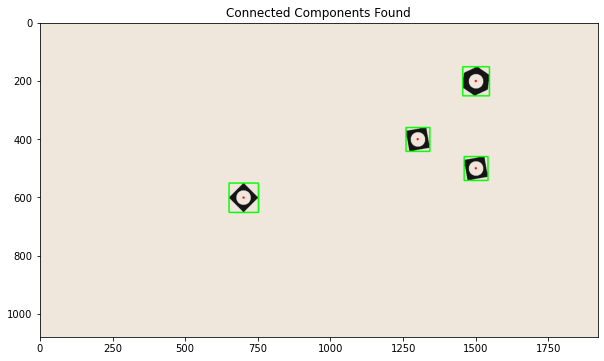

In [35]:
output = conveyor_f100.copy()

#ignore the first component which is the background
for i in range(1, f100_labels):
	x = f100_stats[i, cv.CC_STAT_LEFT]
	y = f100_stats[i, cv.CC_STAT_TOP]
	w = f100_stats[i, cv.CC_STAT_WIDTH]
	h = f100_stats[i, cv.CC_STAT_HEIGHT]
	area = f100_stats[i, cv.CC_STAT_AREA]
	(cX, cY) = f100_centroids[i]
	cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
	cv.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
plt.figure(figsize=(10,10))
plt.title("Connected Components Found")
plt.imshow(cv.cvtColor(output, cv.COLOR_RGB2BGR))

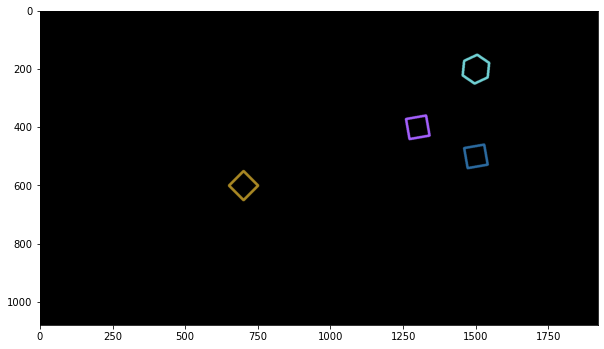

In [8]:
drawing = np.zeros((f100_closing.shape[0], f100_closing.shape[1], 3), dtype=np.uint8)
contours, hierarchy = cv.findContours(f100_closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(drawing, contours, i, color, 7, cv.LINE_8, hierarchy, 0)

plt.figure(figsize=(10,10))
plt.imshow(drawing)

In [9]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [33]:
hex_contours, hex_hierarchy = cv.findContours(hexnut_closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
hex_cnt = hex_contours[0]

square_contours, square_hierarchy = cv.findContours(squarenut_closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
square_cnt = square_contours[0]

count = 0

for i in range (0,len(contours)):
    cnt2 = contours[i]
    ret2 = cv.matchShapes(hex_cnt,cnt2,1,0.0)
    if ret2<0.005:
        count+=1
print("Number of Hexagonal nuts: ",count)


Number of Hexagonal nuts:  1


In [11]:
#function for processing frames
def process(frame,kernel):
    frame_gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    ret,th = cv.threshold(frame_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    frame_closing = cv.morphologyEx(th, cv.MORPH_CLOSE, kernel)
    return frame_closing

In [37]:
# Writing the video
frame_array = []
shape = (1080, 1920, 3)

cap = cv.VideoCapture('conveyor.mp4')
f = 0      
total_count = 0
prev_frame = []
tracking_objects = {}
id = 0
frame_count = 0
while cap.isOpened():                                    
    ret, frame = cap.read()
    frame_count+=1
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    f += 1
    count = 0
    processed_frame = process(frame,kernel)
    current_frame = []
    fcontours, fhierarchy = cv.findContours(processed_frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    #Find the contours in the frame
    for i in range (0,len(fcontours)):
        cnti = fcontours[i]
        area = cv.contourArea(cnti)
        hex_ret = cv.matchShapes(hex_cnt,cnti,1,0.0)
        square_ret = cv.matchShapes(square_cnt,cnti,1,0.0)

        #Check if a hexagonal nut is found
        if hex_ret<0.0005 and area>6400:
            moment = cv.moments(fcontours[i]) 
            cx, cy = int(moment['m10']/moment['m00']),int(moment['m01']/moment['m00'])
            current_frame.append((cx, cy))
            count+=1
        
        #Check if a square nut is found
        elif square_ret<0.0005 and area>4900:
            moment = cv.moments(fcontours[i]) 
            cx, cy = int(moment['m10']/moment['m00']),int(moment['m01']/moment['m00'])
            current_frame.append((cx, cy))
            count+=1
          
   # compare previous and current frame in the first two frames
    if frame_count <= 2:
        for pt in current_frame:
            for pt2 in prev_frame:
                distance = math.hypot(pt2[0] - pt[0], pt2[1] - pt[1])
                #find the distance between centroids
                if distance < 100:
                    tracking_objects[id] = pt
                    id += 1
    else:
        tracking_objects_copy = tracking_objects.copy()
        current_frame_copy = current_frame.copy()
        for object_id, pt2 in tracking_objects_copy.items():
            object_exists = False
            for pt in current_frame_copy:
                #find the distance between centroids
                distance = math.hypot(pt2[0] - pt[0], pt2[1] - pt[1])
                # Update IDs points if it was found in the tracked objects
                if distance < 100:
                    tracking_objects[object_id] = pt
                    object_exists = True
                    if pt in current_frame:
                        current_frame.remove(pt)
                    continue
            # Remove IDs which are not in the current frame
            if not object_exists:
                tracking_objects.pop(object_id)
        # Add new IDs found in the current frame
        for pt in current_frame:
            tracking_objects[id] = pt
            id += 1

    prev_frame = current_frame.copy()
    text = 'Frame:' + str(f) +" Objects in Frame:  "+str(count) + " Total no. of Objects:  "+str(id)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    frame_array.append(frame)
    if cv.waitKey(1) == ord('q'):  
        break


out = cv.VideoWriter('./conveyor_result_190713X.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
